# Descipción del dataset

El dataset Sloan Digital Sky Survey DR14 contiene 10.000 observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es descrita por 17 columnas de características y una columna de clase que la identifica como una estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias mediciones de espectros ópticos y infrarrojos.
Las variables del dataset fueron encontradas en la página:https://www.sdss.org/dr16/help/glossary y se describen a continuación:

* objid : Número identificador del objeto

* ra : Ascención recta en grados

* dec : Declinación en grados

* u,g,r,i,z : magnitudes de los objetos en el SDSS

* run : Número del escaneo

* rerun : tipo de escaneo 

* camcol :  salida de una columna de cámara de CCD como parte de un run.

* field : Parte del camcol que es procesada por el photo pipeline

* specobjid : identificación única de 64 bits codificada en bits utilizada para objetos espectroscópicos ópticos

* class : corresponde a la clase (GALAXY, QSO o STAR)

* redshift : Una medida de la velocidad de recesión de una galaxia u otro objeto del cielo.

* plate : Cada exposición espectroscópica emplea una placa metálica circular grande, delgada, que coloca las fibras ópticas 

* mjd :  indica la fecha en que se tomó una determinada pieza de datos SDSS (imagen o espectro).

* fiberid : ID de fibra  que se le asigna a cada objeto




In [179]:
#importando las librerias a ocupar
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from imblearn.combine import SMOTETomek
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import classification_report





In [180]:
space = pd.read_csv("datos/SDSS-DR14.csv")
#estructura del dataset
print(space.head())

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

In [181]:
#se muestran las primeras 10 filas del dataset
space[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


Se eliminaran los siguientes datos del dataset ya que son irrelevantes al momento de clasificar los elementos:

-mjd

-specobjid

-objid

-fiberid

-rerun

In [182]:
space = space.drop(['objid','fiberid','specobjid','mjd','rerun'], 1)

In [183]:
#datos cuantiativos del dataset

In [184]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
run         10000 non-null int64
camcol      10000 non-null int64
field       10000 non-null int64
class       10000 non-null object
redshift    10000 non-null float64
plate       10000 non-null int64
dtypes: float64(8), int64(4), object(1)
memory usage: 1015.7+ KB


In [185]:
space.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
dtype: int64

Como se ve en el resumen , ninguna de las variables del dataset tiene valores nulos

In [186]:
#distribución de los datos en el dataset

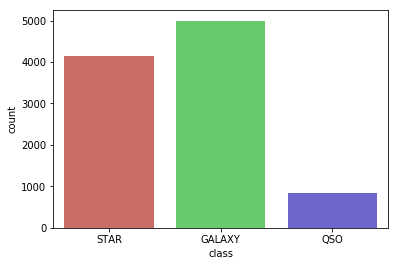

In [187]:
sb.countplot(x='class',data=space, palette='hls')

Graficamente se observa que hay un desbalance entre la clase QSO y las otras dos clases que conforman el dataset

In [188]:
cl = space['class']
clase = pd.get_dummies(cl)
space = space.drop( ['class'] ,1)

In [189]:
#Cantidad exacta de los datos para cada una de las clases

In [190]:
print('total GALAXY : ' + str(np.sum(clase['GALAXY'])))
print('total QSO : ' + str(np.sum(clase['QSO'])))
print('total STAR : ' + str(np.sum(clase['STAR'])))

total GALAXY : 4998
total QSO : 850
total STAR : 4152


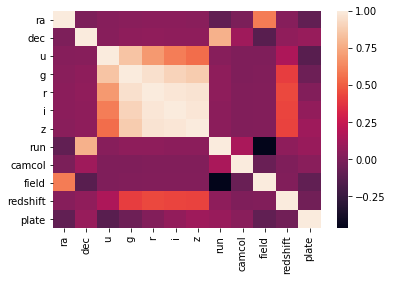

In [191]:
sb.heatmap(space.corr())

Se observa una baja correlación entre algunos datos,pero es importante señalar que dichos datos son importantes en la clasificaciòn de los objetos por lo cual se desiste de eliminarlos

# Algoritmo Regresión lineal

Se hace uso de variables dummies ya que la variablelos datos de la variable "class" son de tipo "string

In [192]:
cl = cl.apply(lambda x: {
        'GALAXY': 1,
        'QSO': 2,
        'STAR': 3
    }[x])
cl.head()

0    3
1    3
2    1
3    3
4    3
Name: class, dtype: int64

In [193]:
space = pd.concat([space, cl],1)
space[:10]

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306,3
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.000055,323,3
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,-0.000111,3306,3
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.000590,3306,3
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,4,269,0.000315,324,3
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,4,269,0.100242,287,1
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,4,269,0.000315,3306,3
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,4,270,0.000089,323,3
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,4,270,0.040508,288,1


In [194]:
X = space.iloc[:,0:12].values
y = space.iloc[:, -1]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

In [196]:
est = sm.OLS(y_train_res, X_train_res).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:44:18   Log-Likelihood:                -8407.9
No. Observations:               10023   AIC:                         1.684e+04
Df Residuals:                   10011   BIC:                         1.693e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0003      0.000     -1.868      0.0

# Algoritmo de regresión logistica

In [197]:
X = space.iloc[:,0:12].values
y = space.iloc[:, -1]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

In [199]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 1.28202266e-03  1.26732579e-02 -1.98078712e-01  3.09968128e+00
   3.06383601e+00 -1.81386833e+00 -4.22897382e+00  2.55740270e-04
  -3.46848634e-02 -9.50280121e-04 -1.50440030e+00 -1.35700263e-03]
 [-5.95794932e-03  1.54510350e-02 -3.40338704e+00  3.46208973e+00
   1.89613971e+00 -6.06284708e-01 -1.32698377e+00 -1.21966981e-03
   1.15593476e-01 -1.98525926e-04  7.14617659e+00 -1.02264041e-04]
 [-4.90685491e-04 -1.11564375e-02  2.56289755e+00 -5.87309852e+00
  -4.65671897e+00  1.90886294e+00  6.04023214e+00 -5.90152066e-04
   1.27596922e-02  6.37068000e-04 -9.74193863e+00  9.80771637e-04]]
intercept: [-0.76461683 -0.4601765   1.14625165]


In [201]:
y_pred = LogReg.predict(X_test)
y_pred

array([3, 1, 3, ..., 3, 3, 3])

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1438,    5,   70],
       [  30,  209,    1],
       [  83,    0, 1164]])

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1513
           2       0.98      0.87      0.92       240
           3       0.94      0.93      0.94      1247

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.95      0.92      0.93      3000
weighted avg       0.94      0.94      0.94      3000



# Árboles de decisión 

In [219]:
trees = tree.DecisionTreeClassifier()
trees = trees.fit(X_train_res,y_train_res)

In [220]:
y_pred = trees.predict(X_test)


In [221]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[1483   28    2]
 [  16  224    0]
 [   2    2 1243]]


In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      1513
           2       0.88      0.93      0.91       240
           3       1.00      1.00      1.00      1247

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.98      0.98      0.98      3000



# Comentarios finales

* Para equilibrar el dataset se utilizo una combinación de undersampling y oversamplig para tratar de manejar el sobreaprendizaje que se podría provocar si se utilzara cualquiera de estas dos tecnicas por separado

* AL utilizar regresión lineal se aprecia que el mayor coeficiente lo adquiere la variable x8 "run"

* El algoritmo de árbol de decisión tiene un mejor rendimiento para clasificar los elementos de este dataset (QSO,Stars,GALAXY class) en comparación a la regresión logistica